In [1]:
###############
### Imports ###
###############

import numpy as np
from functions import *
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

In [2]:
amount = 1500
size = 1000
squares = []
triangles = []
square_areas = []
triangle_areas = []
training = []
weights = np.zeros(size**2)

while len(training) < amount:
    shape_tri, base_tri, height_tri, start_point_tri = generate_triangle(size)
    shape_sq, base_sq, height_sq, start_point_sq = generate_square(size)
    training.append((shape_sq,-1))
    training.append((shape_tri,1))
    square_areas.append(np.sum(shape_sq))
    triangle_areas.append(np.sum(shape_tri))
    amount += 1

print(f'Average square area: {np.mean(square_areas)}, Average triangle area: {np.mean(triangle_areas)}, Ratio: {np.mean(triangle_areas)/np.mean(square_areas)}')

Average square area: 144553.244, Average triangle area: 136477.36466666666, Ratio: 0.9441321473675586


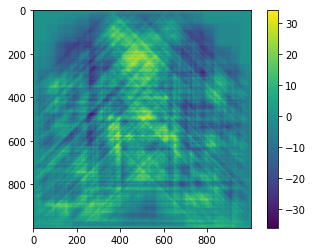

In [3]:
while training:
    i = np.random.randint(0,len(training))
    set = training[i]
    train = set[0].flatten()
    label = set[1]
    res = weights @ train
    if res > 0:
        res = 1
    elif res < 0:
        res = -1
    
    if res != label:
        err = label - res
        weights += err*train

    clear_output(wait=True)
    plt.imshow(weights.reshape((size,size)))
    plt.colorbar()
    plt.show()

    del training[i]

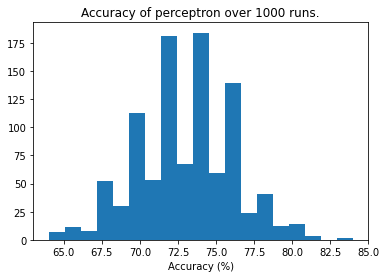

In [4]:
runs = 1000
amount = 100
stats = []

for i in range(runs):
    correct = 0

    for j in range(amount):
        shape_tri, base_tri, height_tri, start_point_tri = generate_triangle(size)
        shape_sq, base_sq, height_sq, start_point_sq = generate_square(size)
        res_sq = shape_sq.flatten() @ weights
        res_tri = shape_tri.flatten() @ weights
        if res_sq < 0:
            correct += 1
        if res_tri > 0:
            correct += 1
    stats.append(round((correct/(2*amount))*100))

plt.hist(list(np.sort(stats)), bins=len(np.unique(stats)));
plt.title(f'Accuracy of perceptron over {runs} runs.');
plt.xlabel('Accuracy (%)');

#Attempted Convergence on weights

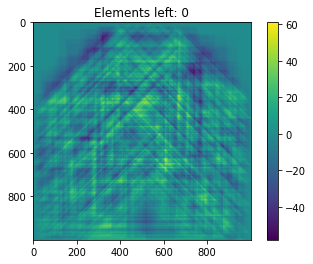

In [4]:
while training:
    i = np.random.randint(0,len(training))
    set = training[i]
    train = set[0].flatten()
    label = set[1]
    res = weights @ train
    if res > 0:
        res = 1
    elif res < 0:
        res = -1
    
    if res != label:
        err = label - res
        weights += err*train
    else:
        del training[i]

    clear_output(wait=True)
    plt.imshow(weights.reshape((size,size)))
    plt.title(f'Elements left: {len(training)}')
    plt.colorbar()
    plt.show()

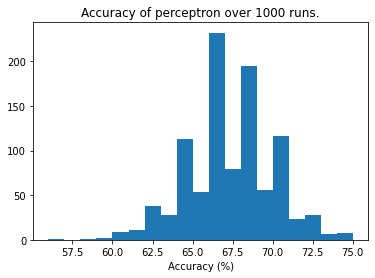

In [5]:
runs = 1000
amount = 100
stats = []

for i in range(runs):
    correct = 0

    for j in range(amount):
        shape_tri, base_tri, height_tri, start_point_tri = generate_triangle(size)
        shape_sq, base_sq, height_sq, start_point_sq = generate_square(size)
        res_sq = shape_sq.flatten() @ weights
        res_tri = shape_tri.flatten() @ weights
        if res_sq < 0:
            correct += 1
        if res_tri > 0:
            correct += 1
    stats.append(round((correct/(2*amount))*100))

plt.hist(list(np.sort(stats)), bins=len(np.unique(stats)));
plt.title(f'Accuracy of perceptron over {runs} runs.');
plt.xlabel('Accuracy (%)');